20BDS0354
A SAI CHARAN
SmartBridge Externship-Artifical Intelligence Course
Course Instructor: HariPrabhu
Vellore Institute of Technology,Vellore Campus
-----------------------------------------
Assignment-2:
Build an ANN model for Drug classification.
This project aims to analyze the relationship between various medical parameters and drug effectiveness. The dataset consists of patient information,
including age, sex, blood pressure levels (BP), cholesterol levels, sodium-to-potassium ratio (Na_to_K), drug type, and corresponding labels. The goal is to
develop a model that can accurately predict the class or category of a given drug based on its features.
--------------------------------
Dataset Link: https://www.kaggle.com/datasets/prathamtripathi/drug-classification
Task 1: Read the dataset and do data pre-processing
Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)
Task 3: Test the model with random data
---------------------------------------------

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Drug=pd.read_csv('drug200.csv')

In [5]:
Unq=Drug['Drug'].unique()
NOutput=len(Unq)
print("No of Output Types/Variables:",NOutput)

No of Output Types/Variables: 5


In [6]:
Drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [7]:
Drug.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
Drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [9]:
Drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<Axes: >

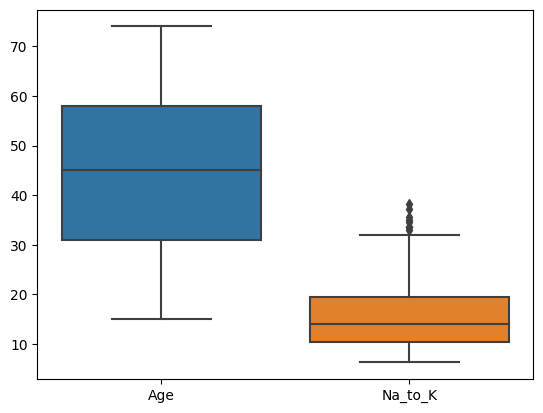

In [10]:
sns.boxplot(Drug)

In [11]:
#Calculate IQR
Q1=Drug['Na_to_K'].quantile(0.25)
Q3=Drug['Na_to_K'].quantile(0.75)
IQR=Q3-Q1
UpperLimit=Q3+1.5*IQR

In [12]:
print("UpperLimit is ",UpperLimit)
print("\n Median is ",Drug['Na_to_K'].median())
print("\n Average is ",Drug['Na_to_K'].mean())

UpperLimit is  32.78175

 Median is  13.9365

 Average is  16.084485


In [13]:
Drug['Na_to_K']=np.where(Drug['Na_to_K']>UpperLimit,Drug['Na_to_K'].median(),Drug['Na_to_K'])

<Axes: >

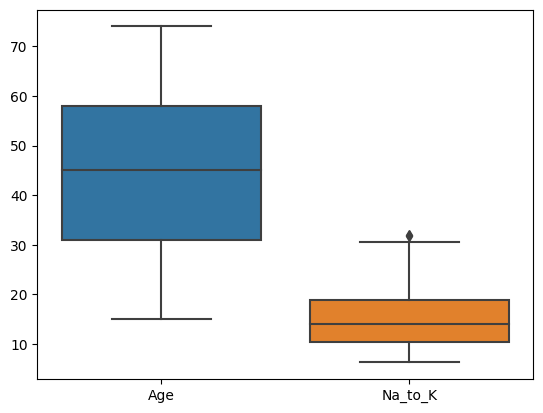

In [14]:
sns.boxplot(Drug)

In [15]:
Drug.shape

(200, 6)

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [17]:
print(Drug['Sex'].unique())
SexLab=LabelEncoder()
SexLab.fit(["M","F"])
Drug['Sex']=SexLab.fit_transform(Drug['Sex'])

['F' 'M']


In [18]:
print(Drug['BP'].unique())
BPLab=LabelEncoder()
BPLab.fit(["LOW","NORMAL","HIGH"])
Drug['BP']=BPLab.fit_transform(Drug['BP'])

['HIGH' 'LOW' 'NORMAL']


In [19]:
print(Drug['Cholesterol'].unique())
ChoLab=LabelEncoder()
ChoLab.fit(["NORMAL","HIGH"])
Drug['Cholesterol']=ChoLab.fit_transform(Drug['Cholesterol'])

['HIGH' 'NORMAL']


In [20]:
print(Drug['Drug'].unique())
DrugLab=LabelEncoder()
DrugLab.fit(['DrugA' 'drugB' 'drugC' 'drugX' 'drugY'])
Drug['Drug']=DrugLab.fit_transform(Drug['Drug'])

['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


<Axes: >

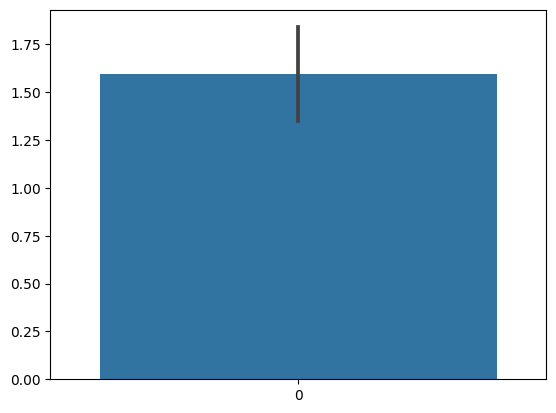

In [21]:
sns.barplot(Drug['Drug'])

In [22]:
Output=Drug['Drug']
Drug.drop(['Drug'],axis=1,inplace=True)

In [23]:
Drug

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [24]:
Output

0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int64

In [25]:
#Splitting
X_train,X_test,y_train,y_test=train_test_split(Drug,Output,test_size=0.3,random_state=21)

In [26]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [27]:
Model=Sequential()

In [28]:
Model.add(Dense(5,activation='relu'))
Model.add(Dense(10,activation='relu'))
Model.add(Dense(32,activation='relu'))
Model.add(Dense(64,activation='relu'))
Model.add(Dense(32,activation='relu'))
Model.add(Dense(NOutput,activation='softmax'))

In [29]:
Model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
Model.fit(X_train,y_train,batch_size=32,epochs=300,validation_data=(X_test,y_test))

Epoch 1/300
5/5 [==============================] - 1s 43ms/step - loss: 4.3058 - accuracy: 0.1571 - val_loss: 3.9650 - val_accuracy: 0.2500
Epoch 2/300
5/5 [==============================] - 0s 6ms/step - loss: 3.1190 - accuracy: 0.2786 - val_loss: 2.8654 - val_accuracy: 0.2500
Epoch 3/300
5/5 [==============================] - 0s 7ms/step - loss: 2.2871 - accuracy: 0.2714 - val_loss: 2.0725 - val_accuracy: 0.1833
Epoch 4/300
5/5 [==============================] - 0s 7ms/step - loss: 1.7391 - accuracy: 0.2143 - val_loss: 1.5763 - val_accuracy: 0.2333
Epoch 5/300
5/5 [==============================] - 0s 6ms/step - loss: 1.4584 - accuracy: 0.4429 - val_loss: 1.3896 - val_accuracy: 0.4500
Epoch 6/300
5/5 [==============================] - 0s 7ms/step - loss: 1.3551 - accuracy: 0.4571 - val_loss: 1.3288 - val_accuracy: 0.4500
Epoch 7/300
5/5 [==============================] - 0s 6ms/step - loss: 1.3152 - accuracy: 0.4571 - val_loss: 1.2983 - val_accuracy: 0.4500
Epoch 8/300
5/5 [=========

In [31]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 dense_2 (Dense)             (None, 32)                352       
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 5)                 165       
                                                                 
Total params: 4,799
Trainable params: 4,799
Non-trainabl

In [32]:
Model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.4735 - accuracy: 0.8667


[0.4735089838504791, 0.8666666746139526]

In [33]:
RandomOutput=Model.predict([[70,1,1,1,49.0834],[49,0,1,0,4.83],[59,1,1,1,18.0083],[25,0,0,0,15.3043]])

1/1 [==============================] - 0s 90ms/step


In [34]:
RandomOutput

array([[1.0000000e+00, 3.9550766e-30, 5.8701353e-24, 2.3690132e-28,
        5.3883498e-36],
       [9.4268098e-03, 1.4912155e-01, 5.8869403e-02, 4.0507674e-01,
        3.7750557e-01],
       [9.9641740e-01, 1.6355570e-03, 4.5262981e-04, 1.4579897e-03,
        3.6465837e-05],
       [9.9448144e-01, 3.1670493e-03, 1.3226164e-03, 1.0276007e-03,
        1.3226073e-06]], dtype=float32)

In [35]:
FinalRandPred=[]
for x in range(len(RandomOutput)):
    A=max(RandomOutput[x,0],RandomOutput[x,1],RandomOutput[x,2],RandomOutput[x,3],RandomOutput[x,4])
    for y in range(len(RandomOutput[0])):
        if(RandomOutput[x,y]==A):
            FinalRandPred.append(y)
        else:
            continue

In [36]:
print(FinalRandPred)

[0, 3, 0, 0]


In [37]:
DrugLab.inverse_transform(FinalRandPred)

array(['DrugY', 'drugC', 'DrugY', 'DrugY'], dtype=object)

This is Observed Due to Domination in Records of Drug Y Which is Transformed as 0 Using LabelEncoder
-------------------------------------------------

In [38]:
test = {
    'Age':[49.,24.],
    'Sex':[1.,1.],
    'BP':[0.,0.],
    'Cholesterol':[1.,0.],
    'Na_to_K':[6.269,3.424]
}
test_df = pd.DataFrame(test)
test_df

,Age,Sex,BP,Cholesterol,Na_to_K
0,49.0,1.0,0.0,1.0,6.269
1,24.0,1.0,0.0,0.0,3.424


In [39]:
SecondOutput=Model.predict(test_df)
FinalRandPred2 = []
for x in range(len(SecondOutput)):
    A = max(SecondOutput[x, 0], SecondOutput[x, 1], SecondOutput[x, 2], SecondOutput[x, 3], SecondOutput[x, 4])
    for y in range(len(SecondOutput[0])):
        if (SecondOutput[x, y] == A):
            FinalRandPred2.append(y)
        else:
            continue

1/1 [==============================] - 0s 51ms/step


In [40]:
SecondOutput

array([[0.00983721, 0.29343963, 0.22400767, 0.43096483, 0.04175057],
       [0.00528875, 0.6479313 , 0.08390797, 0.23515815, 0.02771391]],
      dtype=float32)

In [41]:
DrugLab.inverse_transform(FinalRandPred2)

array(['drugC', 'drugA'], dtype=object)